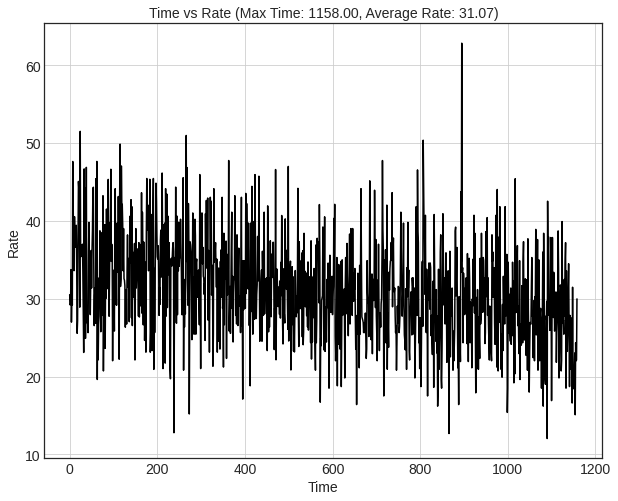

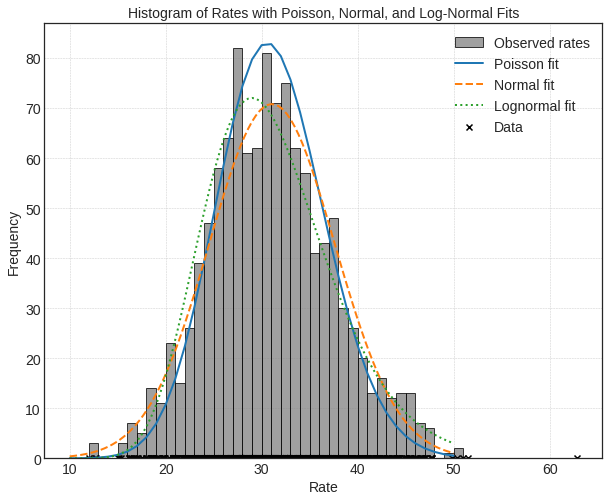

Table for Poisson, Normal, and Log-Normal Distributions:
    Bin Edges  Histogram Bin Counts  Poisson Frequency  Normal Frequency  \
0          10                     0           0.008575          0.386988   
1          11                     0           0.024223          0.627086   
2          12                     3           0.062723          0.992584   
3          13                     0           0.149924          1.534682   
4          14                     0           0.332759          2.317820   
5          15                     3           0.689328          3.419415   
6          16                     7           1.338733          4.927590   
7          17                     5           2.446993          6.936299   
8          18                    14           4.224234          9.537438   
9          19                    11           6.908473         12.809916   
10         20                    23          10.733461         16.806273   
11         21                  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, lognorm
import numpy as np

# Set the background to white
plt.style.use('seaborn-white')

# Load data
df = pd.read_csv('csub_t0.txt', header=None, names=['time', 'rate', 'error', 'nump'])

# Calculate max time and average rate
max_time = df['time'].max()
average_rate = df['rate'].mean()

# Plotting time vs rate
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df['time'], df['rate'], color='black')

# Setting labels and title with font size 14
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Rate', fontsize=14)
ax.set_title(f'Time vs Rate (Max Time: {max_time:.2f}, Average Rate: {average_rate:.2f})', fontsize=14)

# Setting tick parameters with font size 14
ax.tick_params(axis='both', labelsize=14)

ax.grid(True)
plt.show()

# Log-transform the rates for log-normal fitting
log_rates = np.log(df['rate'][df['rate'] > 0])  # ensuring positive rates
log_mean = np.mean(log_rates)
log_std = np.std(log_rates)

# Specify the desired bin edges
bin_edges = np.arange(10, 52, 1)  # Bin edges from 10 to 50

# Plot histogram of rates
fig, ax = plt.subplots(figsize=(10, 8))
count_bins, _, _ = ax.hist(df['rate'], bins=bin_edges, alpha=0.75, label='Observed rates', color='gray', edgecolor='black')

# Calculate the average rate and standard deviation
std_dev = df['rate'].std()

# Compute Poisson distribution with the mean rate
x_poisson = np.arange(10, 51)
poisson_prob = poisson.pmf(x_poisson, mu=average_rate)

# Compute normal distribution PDF
x_normal = np.linspace(10, 50, 100)
normal_pdf = norm.pdf(x_normal, loc=average_rate, scale=std_dev)

# Compute log-normal distribution PDF
x_lognormal = np.linspace(10, 50, 100)
lognormal_pdf = lognorm.pdf(x_lognormal, log_std, scale=np.exp(log_mean))

# Scale normal PDF and log-normal PDF to fit histogram scale
scale_factor = len(df['rate']) * (bin_edges[1] - bin_edges[0])
normal_scaled = normal_pdf * scale_factor
lognormal_scaled = lognormal_pdf * scale_factor

# Plot Poisson distribution
ax.plot(x_poisson, poisson_prob * scale_factor, linestyle='-', linewidth=2, label='Poisson fit')

# Plot Normal distribution
ax.plot(x_normal, normal_scaled, linestyle='--', linewidth=2, label='Normal fit')

# Plot Log-normal distribution
ax.plot(x_lognormal, lognormal_scaled, linestyle=':', linewidth=2, label='Lognormal fit')

# Plot the data points
ax.scatter(df['rate'], np.zeros_like(df['rate']), marker='x', color='black', label='Data')

# Setting labels, title, and legend with font size 14
ax.set_xlabel('Rate', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram of Rates with Poisson, Normal, and Log-Normal Fits', fontsize=14)
ax.legend(fontsize=14)

# Setting tick parameters with font size 14
ax.tick_params(axis='both', labelsize=14)

ax.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Calculate frequencies of Poisson fit for counts ranging from 10 to 50
counts = np.arange(10, 51)
poisson_frequencies = poisson.pmf(counts, mu=average_rate) * scale_factor

# Calculate frequencies of Normal distribution fit for counts ranging from 10 to 50
normal_frequencies = norm.pdf(counts, loc=average_rate, scale=std_dev) * scale_factor

# Calculate frequencies of Log-Normal distribution fit for counts ranging from 10 to 50
lognormal_frequencies = lognorm.pdf(counts, log_std, scale=np.exp(log_mean)) * scale_factor

# Create a DataFrame for the table
distribution_table = pd.DataFrame({
    'Bin Edges': bin_edges[:-1],
    'Histogram Bin Counts': count_bins.astype(int),
    'Poisson Frequency': poisson_frequencies,
    'Normal Frequency': normal_frequencies,
    'Log-Normal Frequency': lognormal_frequencies
})

print("Table for Poisson, Normal, and Log-Normal Distributions:")
print(distribution_table)

# Calculate the observed and expected values from the DataFrame
observed_counts = distribution_table['Histogram Bin Counts']
poisson_expected = distribution_table['Poisson Frequency']
normal_expected = distribution_table['Normal Frequency']
lognormal_expected = distribution_table['Log-Normal Frequency']

# Calculate the squared differences between observed and expected values, divided by expected values
poisson_squared_diff = ((observed_counts - poisson_expected) ** 2) / poisson_expected
normal_squared_diff = ((observed_counts - normal_expected) ** 2) / normal_expected
lognormal_squared_diff = ((observed_counts - lognormal_expected) ** 2) / lognormal_expected

# Sum up the squared differences to get the chi-squared value
chi_squared_poisson = poisson_squared_diff.sum()
chi_squared_normal = normal_squared_diff.sum()
chi_squared_lognormal = lognormal_squared_diff.sum()

print("\nChi-squared value for Poisson fit:", chi_squared_poisson)
print("Chi-squared value for Normal fit:", chi_squared_normal)
print("Chi-squared value for Log-Normal fit:", chi_squared_lognormal)
# Number of observations
n = len(df['rate'])

# For Poisson: 1 parameter (mu)
# Log-likelihood for Poisson: sum of log PMF values
log_likelihood_poisson = np.sum(poisson.logpmf(df['rate'].astype(int), mu=average_rate))
bic_poisson = 1 * np.log(n) - 2 * log_likelihood_poisson

# For Normal: 2 parameters (mean and std)
log_likelihood_normal = np.sum(norm.logpdf(df['rate'], loc=average_rate, scale=std_dev))
bic_normal = 2 * np.log(n) - 2 * log_likelihood_normal

# For Log-Normal: 2 parameters (log-mean and log-std)
log_likelihood_lognormal = np.sum(lognorm.logpdf(df['rate'][df['rate'] > 0], log_std, scale=np.exp(log_mean)))
bic_lognormal = 2 * np.log(len(df['rate'][df['rate'] > 0])) - 2 * log_likelihood_lognormal

# Print the BIC values
print("\nBayesian Information Criterion (BIC):")
print(f"Poisson BIC: {bic_poisson:.2f}")
print(f"Normal BIC: {bic_normal:.2f}")
print(f"Log-Normal BIC: {bic_lognormal:.2f}")


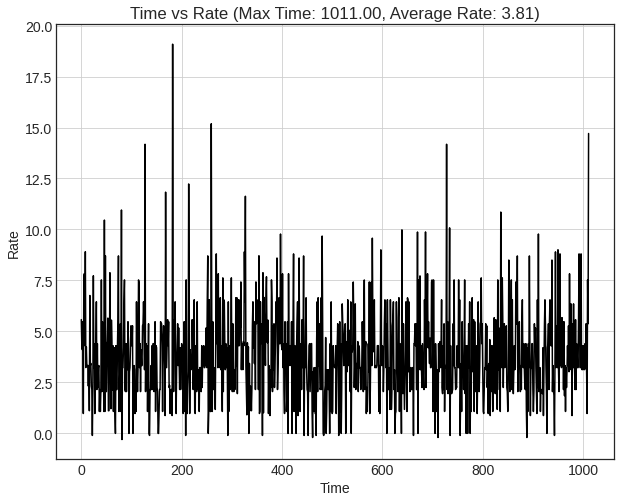

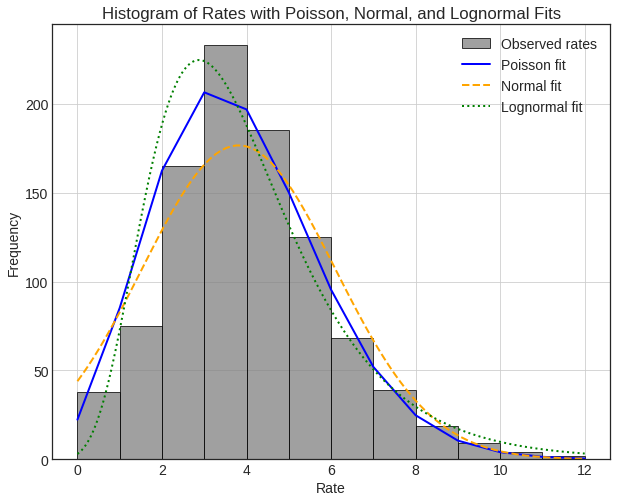

Table of Bin Counts and Fitted Frequencies:
    Bin  Bin Count  Poisson Frequency  Normal Frequency  Lognormal Frequency
0     0         38          22.332394         43.921868             3.006097
1     1         75          85.167835         82.805378            72.741385
2     2        165         162.399969        128.923510           188.348677
3     3        233         206.445309        165.768320           224.020114
4     4        185         196.827310        176.021935           187.788174
5     5        125         150.125921        154.357552           131.714642
6     6         68          95.421176        111.785330            83.857135
7     7         39          51.986078         66.855568            50.586635
8     8         19          24.782060         33.020693            29.627354
9     9          9          10.501110         13.468854            17.092845
10   10          4           4.004751          4.537022             9.801548
11   11          2           1.3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, norm, lognorm

# Set background to white and font size to 14
plt.style.use('seaborn-white')
plt.rcParams.update({'font.size': 14})

# Load data
df = pd.read_csv('csub_t3.txt', header=None, names=['time', 'rate', 'error', 'nump'])

# Calculate the average rate and standard deviation
average_rate = df['rate'].mean()
std_dev = df['rate'].std()

# Calculate max limit of x-axis
max_time = df['time'].max()

# Plotting time vs rate
plt.figure(figsize=(10, 8))
plt.plot(df['time'], df['rate'], color='black')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title(f'Time vs Rate (Max Time: {max_time:.2f}, Average Rate: {average_rate:.2f})')
plt.grid(True)
plt.show()

# Define bin edges from 0 to 12
bin_edges = np.arange(0, 13, 1)

# Plot histogram of rates
plt.figure(figsize=(10, 8))
count_bins, _, _ = plt.hist(df['rate'], bins=bin_edges, alpha=0.75, label='Observed rates', color='gray', edgecolor='black')

# Generate a range of count values for Poisson, normal, and lognormal distributions
x_poisson = np.arange(0, 13)
x_normal = np.linspace(0, 12, 100)
x_lognormal = np.linspace(0, 12, 1000)

# Fit Poisson distribution to the data (use the average rate as the parameter)
poisson_fit = poisson.pmf(x_poisson, mu=average_rate)

# Fit Normal distribution (using mean and standard deviation)
normal_fit_params = norm.fit(df['rate'])
normal_pdf = norm.pdf(x_normal, *normal_fit_params)

# Fit Lognormal distribution (log-transform the data and fit the lognormal parameters)
lognormal_fit_params = lognorm.fit(df['rate'][df['rate'] > 0])  # Ensure positive rates
lognormal_pdf = lognorm.pdf(x_lognormal, *lognormal_fit_params)

# Scale normal PDF and lognormal PDF to fit histogram scale
scale_factor = len(df['rate']) * (bin_edges[1] - bin_edges[0])
normal_scaled = normal_pdf * scale_factor
lognormal_scaled = lognormal_pdf * scale_factor

# Plot Poisson distribution
plt.plot(x_poisson, poisson_fit * scale_factor, color='blue', linestyle='-', linewidth=2, label='Poisson fit')

# Plot Normal distribution
plt.plot(x_normal, normal_scaled, color='orange', linestyle='--', linewidth=2, label='Normal fit')

# Plot Lognormal distribution
plt.plot(x_lognormal, lognormal_scaled, color='green', linestyle=':', linewidth=2, label='Lognormal fit')

plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Rates with Poisson, Normal, and Lognormal Fits')
plt.legend()
plt.grid(True)
plt.show()

# Create table for bin counts and calculated frequencies
bin_counts = count_bins

# Compute Poisson, normal, and lognormal frequencies for bins
poisson_freq = poisson.pmf(bin_edges[:-1], mu=average_rate) * scale_factor
normal_freq = norm.pdf(bin_edges[:-1], *normal_fit_params) * scale_factor
lognormal_freq = lognorm.pdf(bin_edges[:-1], *lognormal_fit_params) * scale_factor

# Function to compute chi-squared value
def chi_squared(observed, expected):
    return np.sum((observed - expected) ** 2 / expected)

# Compute chi-squared for Poisson, Normal, and Lognormal fits
chi_squared_poisson = chi_squared(bin_counts, poisson_freq)
chi_squared_normal = chi_squared(bin_counts, normal_freq)
chi_squared_lognormal = chi_squared(bin_counts, lognormal_freq)

# Create DataFrame for table
table_data = {
    'Bin': bin_edges[:-1],
    'Bin Count': bin_counts.astype(int),
    'Poisson Frequency': poisson_freq,
    'Normal Frequency': normal_freq,
    'Lognormal Frequency': lognormal_freq
}

table_df = pd.DataFrame(table_data)

# Print the table and chi-squared values
print("Table of Bin Counts and Fitted Frequencies:")
print(table_df)

print("\nChi-Squared Values:")
print(f"Poisson: {chi_squared_poisson:.2f}")
print(f"Normal: {chi_squared_normal:.2f}")
print(f"Lognormal: {chi_squared_lognormal:.2f}")

# Number of observations
n = len(df['rate'])

# For Poisson: 1 parameter (mu)
# Log-likelihood for Poisson: sum of log PMF values
log_likelihood_poisson = np.sum(poisson.logpmf(df['rate'].astype(int), mu=average_rate))
bic_poisson = 1 * np.log(n) - 2 * log_likelihood_poisson

# For Normal: 2 parameters (mean and std)
log_likelihood_normal = np.sum(norm.logpdf(df['rate'], loc=average_rate, scale=std_dev))
bic_normal = 2 * np.log(n) - 2 * log_likelihood_normal

# For Log-Normal: 2 parameters (log-mean and log-std)
log_likelihood_lognormal = np.sum(lognorm.logpdf(df['rate'][df['rate'] > 0], log_std, scale=np.exp(log_mean)))
bic_lognormal = 2 * np.log(len(df['rate'][df['rate'] > 0])) - 2 * log_likelihood_lognormal

# Print the BIC values
print("\nBayesian Information Criterion (BIC):")
print(f"Poisson BIC: {bic_poisson:.2f}")
print(f"Normal BIC: {bic_normal:.2f}")
print(f"Log-Normal BIC: {bic_lognormal:.2f}")



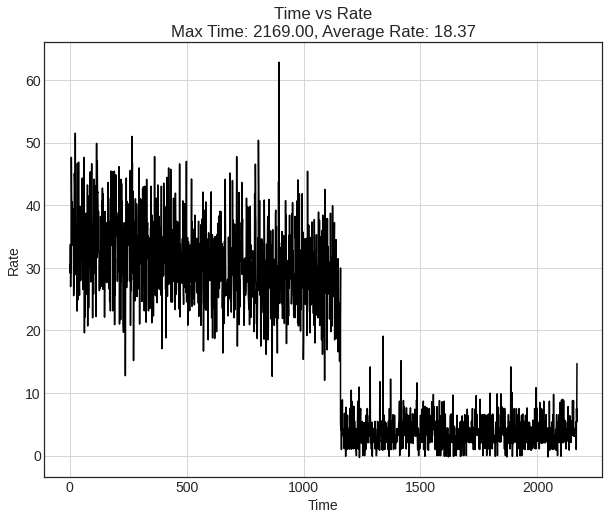

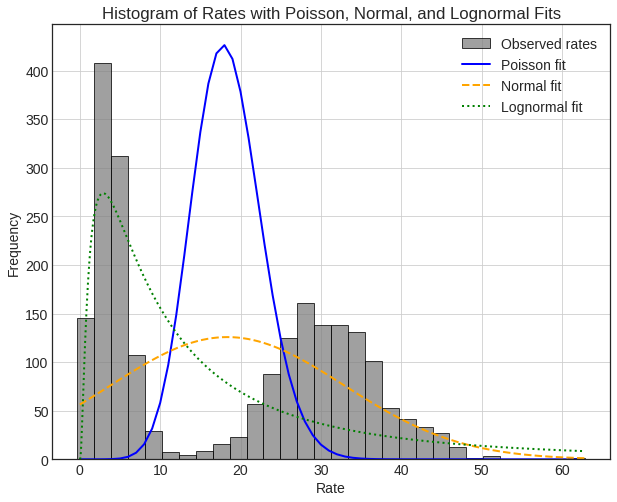

Table of Bin Counts and Frequencies:
    Bin  Bin Count  Poisson Frequency  Normal Frequency  Lognormal Frequency
0     1         75           0.000886         61.366529           180.093875
1     2        165           0.008138         66.493801           260.113293
2     3        233           0.049820         71.707493           273.667864
3     4        185           0.228755         76.962950           263.598443
4     5        125           0.840279         82.211515           245.504774
5     6         68           2.572146         87.401197           225.417759
6     7         39           6.748713         92.477460           205.749175
7     8         19          15.493672         97.384129           187.430309
8     9          9          31.618060        102.064393           170.756582
9    10          4          58.070904        106.461876           155.746237
10   11          2          96.959255        110.521750           142.300536
11   12          4         148.399144  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, norm, lognorm

# Set the background to white
plt.style.use('seaborn-white')
plt.rcParams.update({'font.size': 14})

# Read data from 'csub_t0.txt'
df_t0 = pd.read_csv('csub_t0.txt', header=None, names=['time', 'rate', 'error', 'nump'])

# Read data from 'csub_t3.txt'
df_t3 = pd.read_csv('csub_t3.txt', header=None, names=['time', 'rate', 'error', 'nump'])

# Adjust time values of df_t3 to start where df_t0 ends
max_time_t0 = df_t0['time'].max()
df_t3['time'] += max_time_t0

# Concatenate the dataframes
df_combined = pd.concat([df_t0, df_t3])

# Calculate the maximum time and average rate
max_time = df_combined['time'].max()
average_rate = df_combined['rate'].mean()
std_dev = df_combined['rate'].std()

# Plotting time vs rate from combined data
plt.figure(figsize=(10, 8))
plt.plot(df_combined['time'], df_combined['rate'], color='black')  # Line color: Black
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title(f'Time vs Rate\nMax Time: {max_time:.2f}, Average Rate: {average_rate:.2f}')
plt.grid(True)
plt.show()

# Plot histogram of rates
plt.figure(figsize=(10, 8))
count_bins = plt.hist(df_combined['rate'], bins=30, alpha=0.75, label='Observed rates', color='gray', edgecolor='black')

# Generate a range of count values for Poisson, normal, and lognormal distributions
max_rate = df_combined['rate'].max()
x_poisson = range(int(max_rate) + 1)
x_normal = np.linspace(0, max_rate, 100)
x_lognormal = np.linspace(0, max_rate, 1000)

# Compute Poisson distribution with the mean rate
poisson_prob = poisson.pmf(x_poisson, mu=average_rate)

# Compute normal distribution PDF
normal_pdf = norm.pdf(x_normal, loc=average_rate, scale=std_dev)

# Log-transform the rates for lognormal fitting
log_rates = np.log(df_combined['rate'][df_combined['rate'] > 0])  # ensuring positive rates
log_mean = np.mean(log_rates)
log_std = np.std(log_rates)

# Compute lognormal distribution PDF
lognormal_pdf = lognorm.pdf(x_lognormal, log_std, scale=np.exp(log_mean))

# Scale normal PDF and lognormal PDF to fit histogram scale
scale_factor = len(df_combined['rate']) * (count_bins[1][1] - count_bins[1][0])
normal_scaled = normal_pdf * scale_factor
lognormal_scaled = lognormal_pdf * scale_factor

# Plot Poisson distribution
plt.plot(x_poisson, poisson_prob * scale_factor, color='blue', linestyle='-', linewidth=2, label='Poisson fit')

# Plot Normal distribution
plt.plot(x_normal, normal_scaled, color='orange', linestyle='--', linewidth=2, label='Normal fit')

# Plot Lognormal distribution
plt.plot(x_lognormal, lognormal_scaled, color='green', linestyle=':', linewidth=2, label='Lognormal fit')

plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Rates with Poisson, Normal, and Lognormal Fits')
plt.legend()
plt.grid(True)
plt.show()

# Define bin edges from 0 to 50 for chi-squared calculation
bin_edges = np.arange(1, 50, 1)
count_bins, _ = np.histogram(df_combined['rate'], bins=bin_edges)

# Compute Poisson, normal, and lognormal frequencies for bins
poisson_freq = poisson.pmf(bin_edges[:-1], mu=average_rate) * scale_factor
normal_freq = norm.pdf(bin_edges[:-1], loc=average_rate, scale=std_dev) * scale_factor
lognormal_freq = lognorm.pdf(bin_edges[:-1], log_std, scale=np.exp(log_mean)) * scale_factor

# Compute chi-squared values
chi_squared_poisson = np.sum((count_bins - poisson_freq) ** 2 / poisson_freq)
chi_squared_normal = np.sum((count_bins - normal_freq) ** 2 / normal_freq)
chi_squared_lognormal = np.sum((count_bins - lognormal_freq) ** 2 / lognormal_freq)

# Create table for bin counts and calculated frequencies
table_data = {
    'Bin': bin_edges[:-1],
    'Bin Count': count_bins,
    'Poisson Frequency': poisson_freq,
    'Normal Frequency': normal_freq,
    'Lognormal Frequency': lognormal_freq
}
table_df = pd.DataFrame(table_data)

print("Table of Bin Counts and Frequencies:")
print(table_df)

print("\nChi-Squared Values:")
print(f"Poisson: {chi_squared_poisson:.2f}")
print(f"Normal: {chi_squared_normal:.2f}")
print(f"Lognormal: {chi_squared_lognormal:.2f}")
# Number of observations
n = len(df['rate'])

# For Poisson: 1 parameter (mu)
# Log-likelihood for Poisson: sum of log PMF values
log_likelihood_poisson = np.sum(poisson.logpmf(df['rate'].astype(int), mu=average_rate))
bic_poisson = 1 * np.log(n) - 2 * log_likelihood_poisson

# For Normal: 2 parameters (mean and std)
log_likelihood_normal = np.sum(norm.logpdf(df['rate'], loc=average_rate, scale=std_dev))
bic_normal = 2 * np.log(n) - 2 * log_likelihood_normal

# For Log-Normal: 2 parameters (log-mean and log-std)
log_likelihood_lognormal = np.sum(lognorm.logpdf(df['rate'][df['rate'] > 0], log_std, scale=np.exp(log_mean)))
bic_lognormal = 2 * np.log(len(df['rate'][df['rate'] > 0])) - 2 * log_likelihood_lognormal

# Print the BIC values
print("\nBayesian Information Criterion (BIC):")
print(f"Poisson BIC: {bic_poisson:.2f}")
print(f"Normal BIC: {bic_normal:.2f}")
print(f"Log-Normal BIC: {bic_lognormal:.2f}")


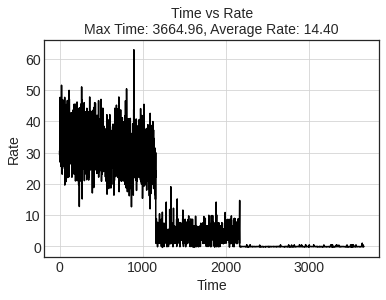

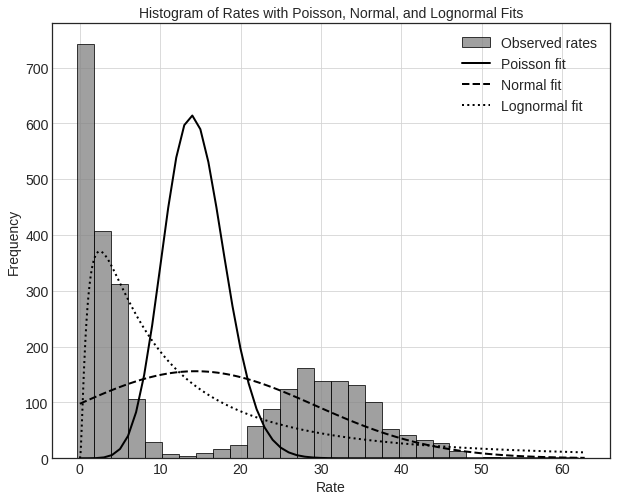

Table of Bin Counts and Frequencies:
    Bin  Bin Count  Poisson Frequency  Normal Frequency  Lognormal Frequency
0     1         76       4.665804e-02        104.097738           279.835929
1     2        165       3.359958e-01        110.327046           364.921157
2     3        233       1.613058e+00        116.403603           366.255962
3     4        185       5.808010e+00        122.262870           343.106012
4     5        125       1.672995e+01        127.839918           313.747885
..  ...        ...                ...               ...                  ...
56   57          0       8.583728e-14          2.619810            13.091992
57   58          0       2.131500e-14          2.157543            12.613754
58   59          0       5.203202e-15          1.768858            12.158280
59   60          0       1.248984e-15          1.443678            11.724223
60   61          0       2.948929e-16          1.172982            11.310337

[61 rows x 5 columns]

Chi-Squared Val

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, norm, lognorm

# Set Matplotlib background to white
plt.style.use('seaborn-white')

# Read data from files
df_t0 = pd.read_csv('csub_t0.txt', header=None, names=['time', 'rate', 'error', 'nump'])
df_t3 = pd.read_csv('csub_t3.txt', header=None, names=['time', 'rate', 'error', 'nump'])

# Adjust time values
df_t3['time'] += df_t0['time'].max()
df_combined = pd.concat([df_t0, df_t3])

df_t5 = pd.read_csv('csub_t5.txt', header=None, names=['time', 'rate', 'error', 'nump'])
df_t5['time'] += df_combined['time'].max()
df_combined = pd.concat([df_combined, df_t5])

# Calculate max time and average rate
max_time = df_combined['time'].max()
average_rate = df_combined['rate'].mean()

# Plot time vs rate
fig, ax = plt.subplots(facecolor='white')  # White background
ax.set_facecolor('white')
ax.plot(df_combined['time'], df_combined['rate'], color='black')

# Set labels, title, and tick sizes
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Rate', fontsize=14)
ax.set_title(f'Time vs Rate\nMax Time: {max_time:.2f}, Average Rate: {average_rate:.2f}', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, color='lightgray')

plt.show()

# Histogram of rates
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')
ax.set_facecolor('white')

count_bins = ax.hist(df_combined['rate'], bins=30, alpha=0.75, label='Observed rates', color='gray', edgecolor='black')

# Generate x values for distributions
max_rate = df_combined['rate'].max()
x_poisson = range(int(max_rate) + 1)
x_normal = np.linspace(0, max_rate, 100)
x_lognormal = np.linspace(0, max_rate, 1000)

# Compute Poisson, Normal, and Lognormal distributions
poisson_prob = poisson.pmf(x_poisson, mu=average_rate)
std_dev = df_combined['rate'].std()
normal_pdf = norm.pdf(x_normal, loc=average_rate, scale=std_dev)
log_rates = np.log(df_combined['rate'][df_combined['rate'] > 0])
log_mean, log_std = np.mean(log_rates), np.std(log_rates)
lognormal_pdf = lognorm.pdf(x_lognormal, log_std, scale=np.exp(log_mean))

# Scale distributions
scale_factor = len(df_combined['rate']) * (count_bins[1][1] - count_bins[1][0])
normal_scaled = normal_pdf * scale_factor
lognormal_scaled = lognormal_pdf * scale_factor

# Plot distributions
ax.plot(x_poisson, poisson_prob * scale_factor, color='black', linestyle='-', linewidth=2, label='Poisson fit')
ax.plot(x_normal, normal_scaled, color='black', linestyle='--', linewidth=2, label='Normal fit')
ax.plot(x_lognormal, lognormal_scaled, color='black', linestyle=':', linewidth=2, label='Lognormal fit')

# Set labels, title, and legend
ax.set_xlabel('Rate', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram of Rates with Poisson, Normal, and Lognormal Fits', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True, color='lightgray')

plt.show()

# Chi-Square Calculation
bin_edges = np.arange(1, int(max_rate) + 1, 1)
observed_counts, _ = np.histogram(df_combined['rate'], bins=bin_edges)

# Expected frequencies
poisson_freq = poisson.pmf(bin_edges[:-1], mu=average_rate) * scale_factor
normal_freq = norm.pdf(bin_edges[:-1], loc=average_rate, scale=std_dev) * scale_factor
lognormal_freq = lognorm.pdf(bin_edges[:-1], log_std, scale=np.exp(log_mean)) * scale_factor

# Chi-square values
chi_squared_poisson = np.sum((observed_counts - poisson_freq) ** 2 / poisson_freq)
chi_squared_normal = np.sum((observed_counts - normal_freq) ** 2 / normal_freq)
chi_squared_lognormal = np.sum((observed_counts - lognormal_freq) ** 2 / lognormal_freq)

# Table of bin counts and frequencies
table_df = pd.DataFrame({
    'Bin': bin_edges[:-1],
    'Bin Count': observed_counts,
    'Poisson Frequency': poisson_freq,
    'Normal Frequency': normal_freq,
    'Lognormal Frequency': lognormal_freq
})

print("Table of Bin Counts and Frequencies:")
print(table_df)

print("\nChi-Squared Values:")
print(f"Poisson: {chi_squared_poisson:.2f}")
print(f"Normal: {chi_squared_normal:.2f}")
print(f"Lognormal: {chi_squared_lognormal:.2f}")

# Number of observations
n = len(df['rate'])

# For Poisson: 1 parameter (mu)
# Log-likelihood for Poisson: sum of log PMF values
log_likelihood_poisson = np.sum(poisson.logpmf(df['rate'].astype(int), mu=average_rate))
bic_poisson = 1 * np.log(n) - 2 * log_likelihood_poisson

# For Normal: 2 parameters (mean and std)
log_likelihood_normal = np.sum(norm.logpdf(df['rate'], loc=average_rate, scale=std_dev))
bic_normal = 2 * np.log(n) - 2 * log_likelihood_normal

# For Log-Normal: 2 parameters (log-mean and log-std)
log_likelihood_lognormal = np.sum(lognorm.logpdf(df['rate'][df['rate'] > 0], log_std, scale=np.exp(log_mean)))
bic_lognormal = 2 * np.log(len(df['rate'][df['rate'] > 0])) - 2 * log_likelihood_lognormal

# Print the BIC values
print("\nBayesian Information Criterion (BIC):")
print(f"Poisson BIC: {bic_poisson:.2f}")
print(f"Normal BIC: {bic_normal:.2f}")
print(f"Log-Normal BIC: {bic_lognormal:.2f}")



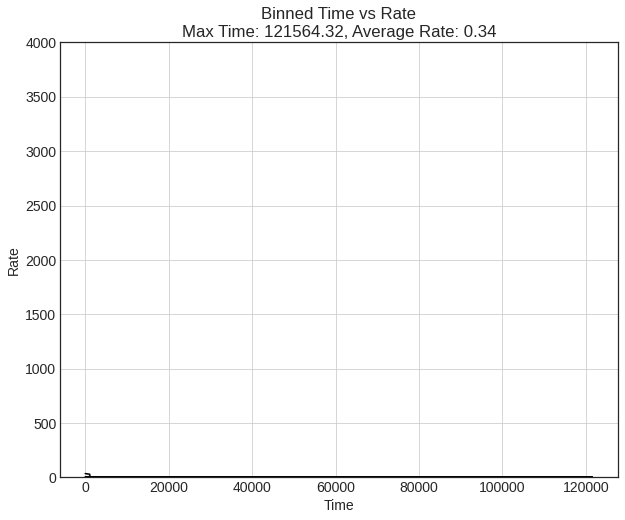

/tmp/ipykernel_18391/4100928364.py:73: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, 000)  # Limit y-axis to 4000


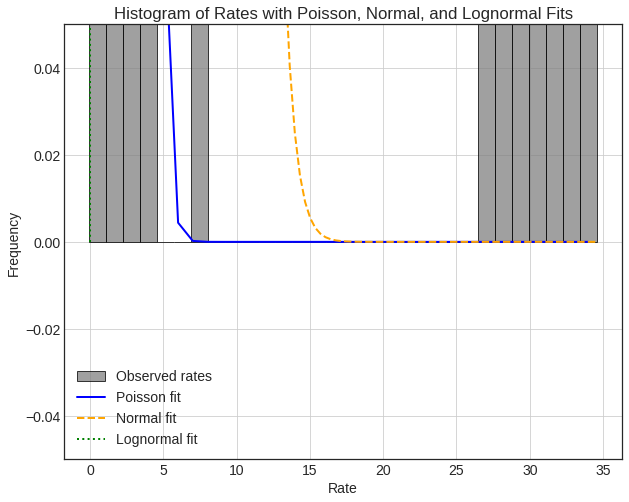

Table of Bin Counts and Frequencies:
     Bin  Bin Count  Poisson Frequency  Normal Frequency  Lognormal Frequency
0    1.0          0       6.500830e+02      3.326047e+02           137.444388
1    2.0          1       1.121093e+02      2.954418e+02            42.114858
2    3.0         15       1.288911e+01      2.368470e+02            20.269852
3    4.0          4       1.111388e+00      1.713628e+02            11.854091
4    5.0          0       7.666522e-02      1.118968e+02             7.740674
5    6.0          0       4.407069e-03      6.594339e+01             5.428911
6    7.0          1       2.171473e-04      3.507337e+01             4.003698
7    8.0          0       9.361970e-06      1.683589e+01             3.064966
8    9.0          0       3.587793e-07      7.293690e+00             2.415122
9   10.0          0       1.237457e-08      2.851747e+00             1.947444
10  11.0          0       3.880075e-10      1.006299e+00             1.600197
11  12.0          0       1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, norm, lognorm

# Set the background to white
plt.style.use('seaborn-white')
plt.rcParams.update({'font.size': 14})

# Read data
df = pd.read_csv('combined_light_curve.txt', header=None, names=['time', 'rate', 'error', 'nump'])

# Apply binning (adjust 'bin_size' as needed)
bin_size = 50  # Number of points per bin
df['bin_index'] = df.index // bin_size

# Aggregate data by bins (mean of rate, first value of time in each bin)
df_binned = df.groupby('bin_index').agg({'time': 'first', 'rate': 'mean'}).reset_index(drop=True)

# Extract useful statistics
max_time = df_binned['time'].max()
average_rate = df_binned['rate'].mean()
std_dev = df_binned['rate'].std()

# Plot Time vs Rate (Binned Data)
plt.figure(figsize=(10, 8))
plt.plot(df_binned['time'], df_binned['rate'], color='black')  # Line color: Black
plt.ylim(0, 4000)  # Limit y-axis to 4000
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title(f'Binned Time vs Rate\nMax Time: {max_time:.2f}, Average Rate: {average_rate:.2f}')
plt.grid(True)
plt.show()

# Plot histogram of rates
plt.figure(figsize=(10, 8))
count_bins = plt.hist(df_binned['rate'], bins=30, alpha=0.75, label='Observed rates', color='gray', edgecolor='black')

# Generate range of count values for distributions
max_rate = df_binned['rate'].max()
x_poisson = range(int(max_rate) + 1)
x_normal = np.linspace(0, max_rate, 100)
x_lognormal = np.linspace(0, max_rate, 1000)

# Compute Poisson distribution
poisson_prob = poisson.pmf(x_poisson, mu=average_rate)

# Compute normal distribution PDF
normal_pdf = norm.pdf(x_normal, loc=average_rate, scale=std_dev)

# Log-transform rates for lognormal fitting
log_rates = np.log(df_binned['rate'][df_binned['rate'] > 0])  # Ensuring positive rates
log_mean = np.mean(log_rates)
log_std = np.std(log_rates)

# Compute lognormal distribution PDF
lognormal_pdf = lognorm.pdf(x_lognormal, log_std, scale=np.exp(log_mean))

# Scale distributions to match histogram
scale_factor = len(df_binned['rate']) * (count_bins[1][1] - count_bins[1][0])
normal_scaled = normal_pdf * scale_factor
lognormal_scaled = lognormal_pdf * scale_factor

# Plot Poisson fit
plt.plot(x_poisson, poisson_prob * scale_factor, color='blue', linestyle='-', linewidth=2, label='Poisson fit')

# Plot Normal fit
plt.plot(x_normal, normal_scaled, color='orange', linestyle='--', linewidth=2, label='Normal fit')

# Plot Lognormal fit
plt.plot(x_lognormal, lognormal_scaled, color='green', linestyle=':', linewidth=2, label='Lognormal fit')

plt.ylim(0, 000)  # Limit y-axis to 4000
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Rates with Poisson, Normal, and Lognormal Fits')
plt.legend()
plt.grid(True)
plt.show()

# Define bin edges for chi-square calculation
bin_edges = np.arange(1, min(4000, max_rate), 1)
count_bins, _ = np.histogram(df_binned['rate'], bins=bin_edges)

# Compute expected frequencies
poisson_freq = poisson.pmf(bin_edges[:-1], mu=average_rate) * scale_factor
normal_freq = norm.pdf(bin_edges[:-1], loc=average_rate, scale=std_dev) * scale_factor
lognormal_freq = lognorm.pdf(bin_edges[:-1], log_std, scale=np.exp(log_mean)) * scale_factor

# Compute chi-squared values
chi_squared_poisson = np.sum((count_bins - poisson_freq) ** 2 / poisson_freq)
chi_squared_normal = np.sum((count_bins - normal_freq) ** 2 / normal_freq)
chi_squared_lognormal = np.sum((count_bins - lognormal_freq) ** 2 / lognormal_freq)

# Create a table for bin counts and calculated frequencies
table_data = {
    'Bin': bin_edges[:-1],
    'Bin Count': count_bins,
    'Poisson Frequency': poisson_freq,
    'Normal Frequency': normal_freq,
    'Lognormal Frequency': lognormal_freq
}
table_df = pd.DataFrame(table_data)

print("Table of Bin Counts and Frequencies:")
print(table_df)

print("\nChi-Squared Values:")
print(f"Poisson: {chi_squared_poisson:.2f}")
print(f"Normal: {chi_squared_normal:.2f}")
print(f"Lognormal: {chi_squared_lognormal:.2f}")

# Number of observations
n = len(df['rate'])

# For Poisson: 1 parameter (mu)
# Log-likelihood for Poisson: sum of log PMF values
log_likelihood_poisson = np.sum(poisson.logpmf(df['rate'].astype(int), mu=average_rate))
bic_poisson = 1 * np.log(n) - 2 * log_likelihood_poisson

# For Normal: 2 parameters (mean and std)
log_likelihood_normal = np.sum(norm.logpdf(df['rate'], loc=average_rate, scale=std_dev))
bic_normal = 2 * np.log(n) - 2 * log_likelihood_normal

# For Log-Normal: 2 parameters (log-mean and log-std)
log_likelihood_lognormal = np.sum(lognorm.logpdf(df['rate'][df['rate'] > 0], log_std, scale=np.exp(log_mean)))
bic_lognormal = 2 * np.log(len(df['rate'][df['rate'] > 0])) - 2 * log_likelihood_lognormal

# Print the BIC values
print("\nBayesian Information Criterion (BIC):")
print(f"Poisson BIC: {bic_poisson:.2f}")
print(f"Normal BIC: {bic_normal:.2f}")
print(f"Log-Normal BIC: {bic_lognormal:.2f}")

